<a href="https://colab.research.google.com/github/pchlenski/misdeed/blob/main/notebooks/MiSDEED_custom_distributions_and_data_realism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Typical imports
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

# # Colab imports
# from google.colab import drive
# drive.mount('/content/drive')

# # Environmental variables
# dd = '/content/drive/My Drive/notebooks/melody/data/' # data dir

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !git clone https://github.com/pchlenski/misdeed
# !cd /content/misdeed && git pull

# # import misdeed
# from misdeed.src.OmicsGenerator import OmicsGenerator
# from misdeed.src.visualization import *

!pip install misdeed
from misdeed.OmicsGenerator import OmicsGenerator
from misdeed.visualization import *

fatal: destination path 'misdeed' already exists and is not an empty directory.
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/pchlenski/misdeed
   54dd112..71e7ff4  main       -> origin/main
Updating 54dd112..71e7ff4
Fast-forward
 src/inference.py | 10 +++-------
 1 file changed, 3 insertions(+), 7 deletions(-)


In [ ]:
# Other imports

from functools import partial

# Specifying noise distribution

This section verifies that specifying distributions actually works. There are a couple different places where we've tried this. I am trying to be exhaustive about it

Node 'n0' initialized
Interaction 'n0->n0' added
set m:(n0)->(n0):   0:10    0:10
Added x0 vector to node n0
Added growth rates to node n0
Initialized


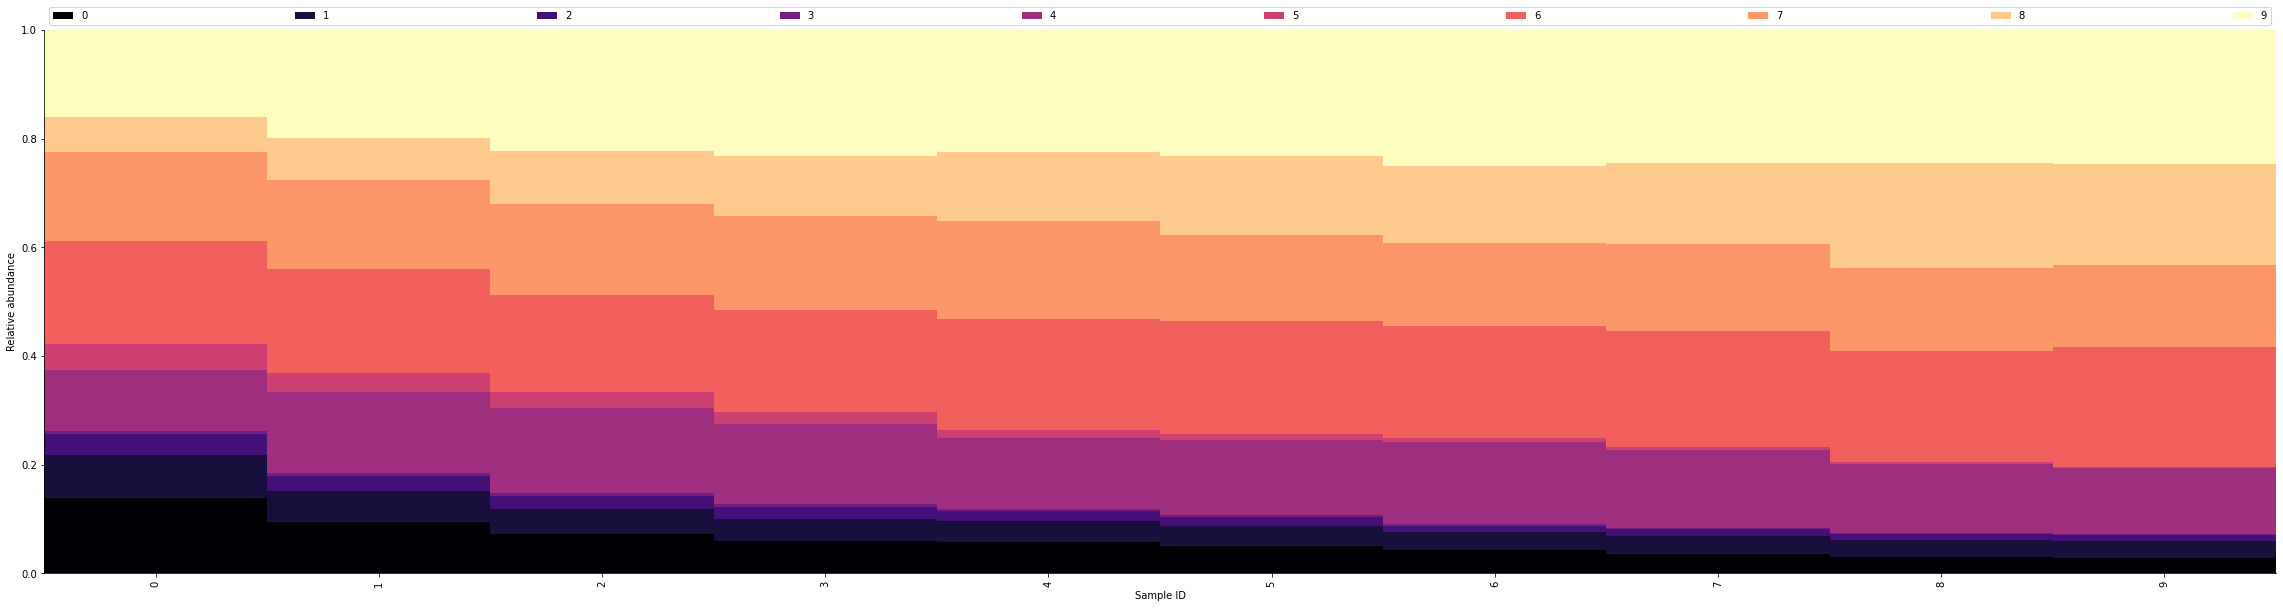

In [ ]:
# As part of the generate() function

gen = OmicsGenerator(10, time_points=500, init_full=True)
x1, z1, y1 = gen.generate(downsample=50)
plot_timecourse(y1['n0'])

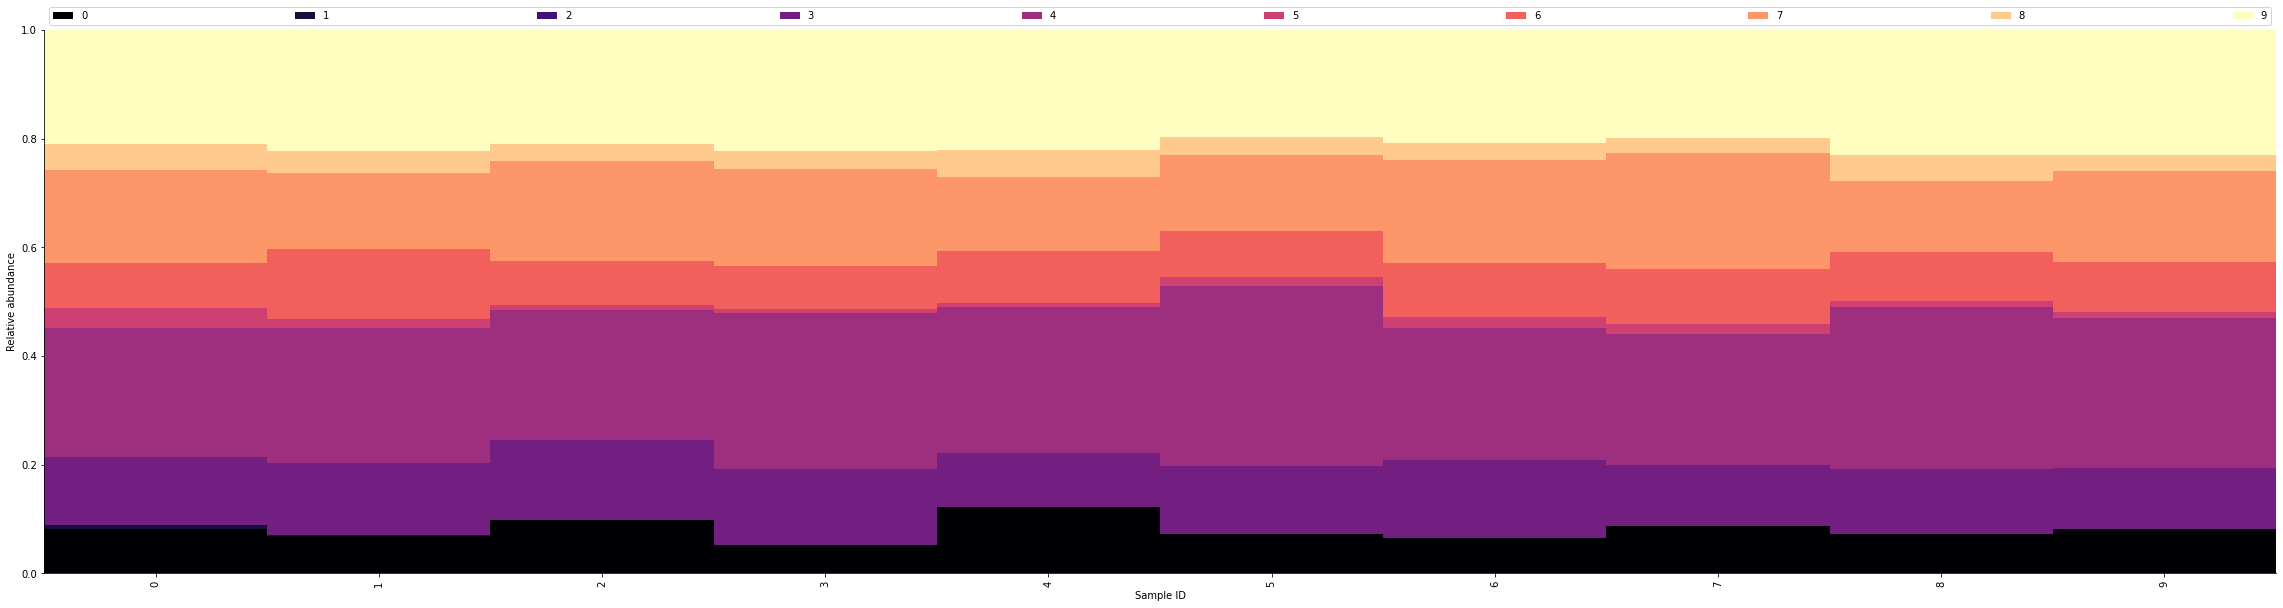

In [ ]:
dist = partial(np.random.exponential, scale=1e-1)
x2, z2, y2 = gen.generate(downsample=50, noise_distribution=dist)
plot_timecourse(y2['n0'])

(array([5.687e+03, 2.458e+03, 1.034e+03, 4.530e+02, 2.120e+02, 9.200e+01,
        3.600e+01, 1.900e+01, 7.000e+00, 2.000e+00]),
 array([2.79443993e-06, 8.36455609e-02, 1.67288327e-01, 2.50931094e-01,
        3.34573860e-01, 4.18216627e-01, 5.01859393e-01, 5.85502159e-01,
        6.69144926e-01, 7.52787692e-01, 8.36430459e-01]),
 <a list of 10 Patch objects>)

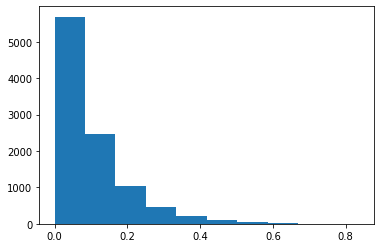

In [ ]:
plt.hist(dist(size=10000))

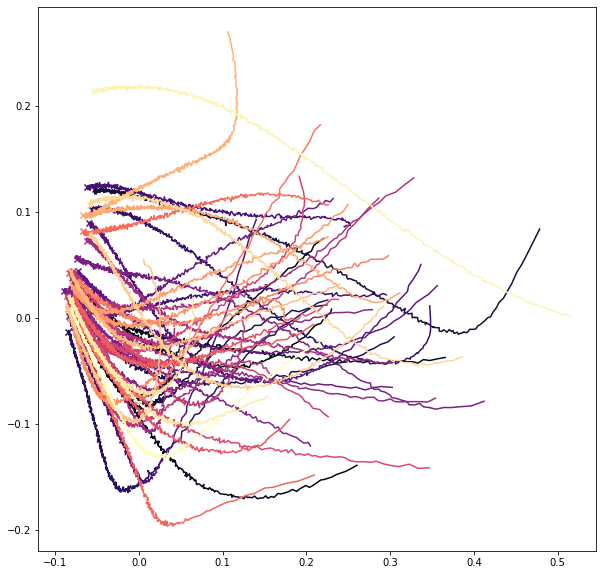

In [ ]:
# As part of the initialization for generate_multiple

fig = plt.figure(figsize=(10,10))
x3, z3, y3 = gen.generate_multiple(50, noise_var=1e-5)
plot_pca([y3], 'n0')

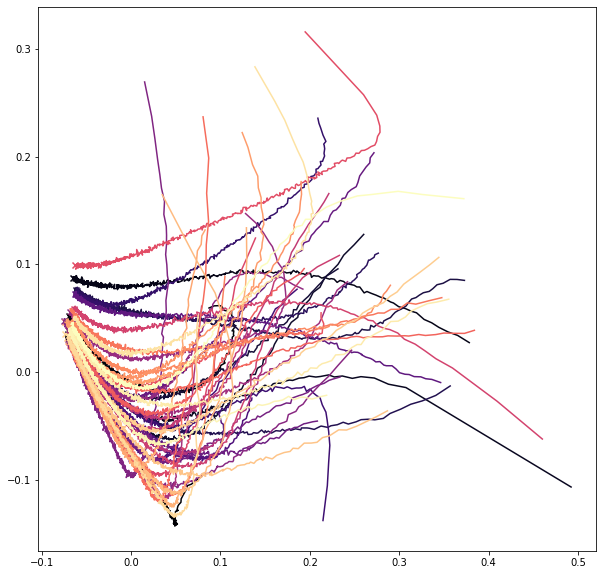

In [ ]:
fig = plt.figure(figsize=(10,10))
x4, z4, y4 = gen.generate_multiple(50, noise_var=1e-5, initial_distribution=np.random.lognormal)
plot_pca([y4], 'n0')

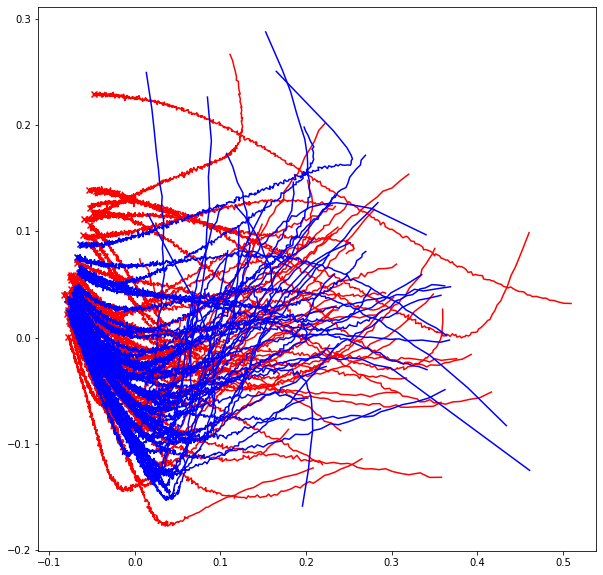

In [ ]:
fig = plt.figure(figsize=(10,10))
plot_pca([y3, y4], 'n0', colors=['red', 'blue'])

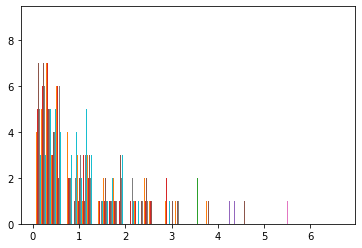

In [ ]:
plt.hist([x['n0'][0] for x in x3])
plt.show()

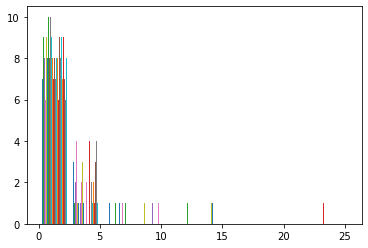

In [ ]:
plt.hist([x['n0'][0] for x in x4])
plt.show()

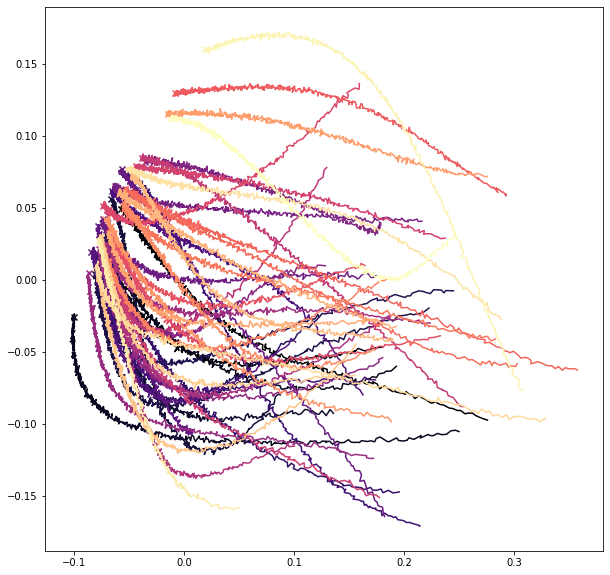

In [ ]:
fig = plt.figure(figsize=(10,10))
x5, z5, y5 = gen.generate_multiple(50, noise_var=1e-5, initial_distribution=np.random.uniform)
plot_pca([y5], 'n0')

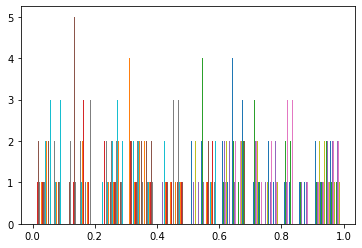

In [ ]:
plt.hist([x['n0'][0] for x in x5])
plt.show()

# Data realism

## Basic exploration

In [ ]:
!pip install --upgrade openpyxl

In [ ]:
stein13 = pd.read_excel(f"{dd}Dataset_S1.xlsx", header=[0,1,3])
stein13 = stein13.drop([13,12,0], axis=0)
stein13 = stein13.set_index(('Population', 'Replicate', 'time (in d)'))
stein13.index.name = "Clade"

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
stein13

2  ...         3
                                                   1  ...         3
                                                  0   ...        23
Clade                                                 ...          
undefined_genus_of_Enterobacteriaceae       0.000024  ...  2.131800
Blautia                                     0.000867  ...  1.664900
Barnesiella                                 0.092745  ...  0.001939
undefined_genus_of_unclassified_Mollicutes  0.001445  ...  4.653300
undefined_genus_of_Lachnospiraceae          0.219580  ...  0.002106
Akkermansia                                 0.033082  ...  0.003220
Clostridium_difficile                       0.000000  ...  3.046400
unclassified_Lachnospiraceae                0.032505  ...  0.001451
Coprobacillus                               0.000144  ...  0.000270
Enterococcus                                0.000037  ...  0.009661
Other                                       0.111380  ...  3.729100

[11 rows x 77 columns]

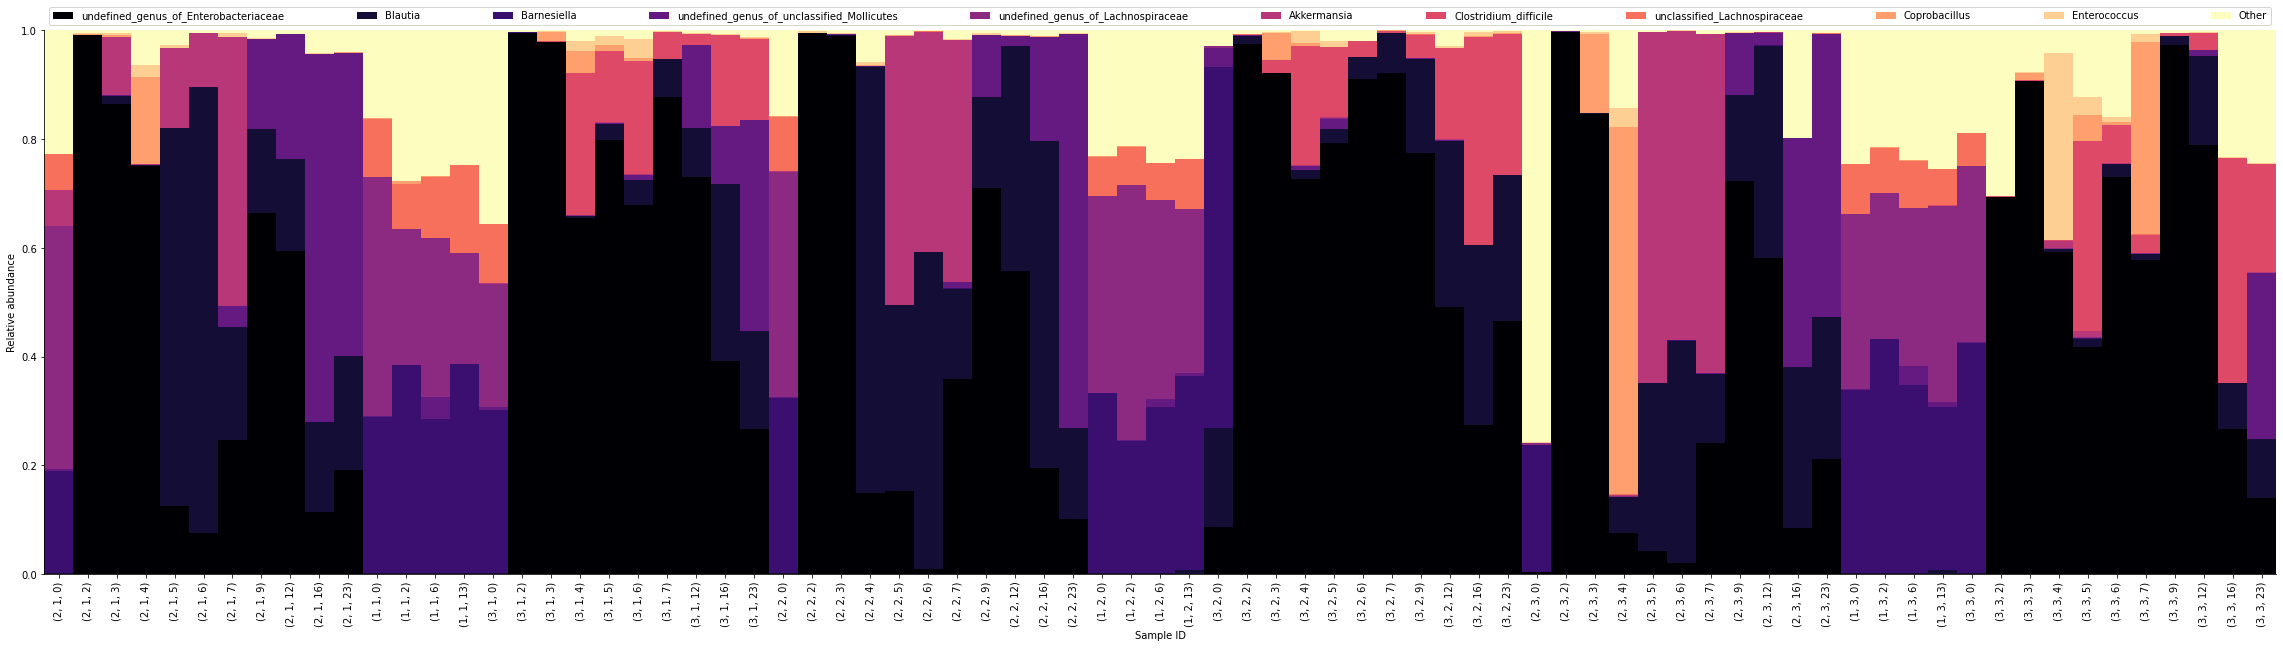

In [ ]:
from misdeed.src.visualization import plot_timecourse

# Create relative abundances
stein13_relative = stein13 / stein13.sum()

# Plot data
plot_timecourse(stein13_relative.transpose())

In [ ]:
first_samples = stein13_relative[[(2,1,0), (1,1,0), (3,1,0), (2,2,0), (3,2,0), (2,3,0), (3,3,0), (1,3,0)]]

<Figure size 720x720 with 0 Axes>

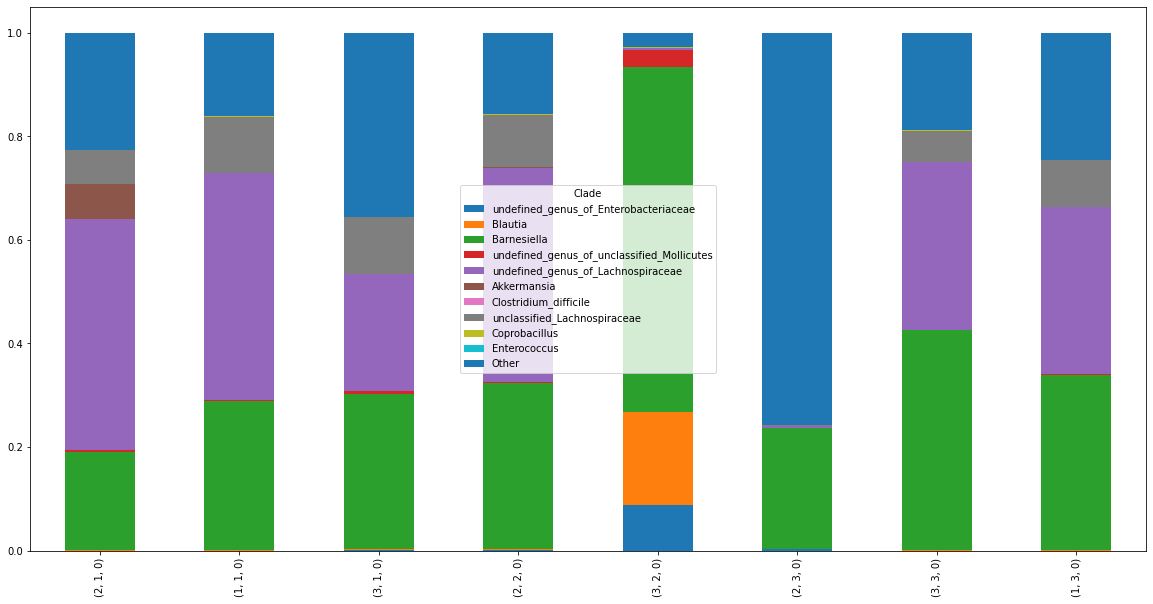

In [ ]:
fig = plt.figure(figsize=(10,10))
first_samples.transpose().plot(kind='bar', stacked=True, figsize=(20,10))
plt.show()

## Alpha-diversity

In [ ]:
!pip install scikit-bio
from skbio.diversity import alpha_diversity, beta_diversity

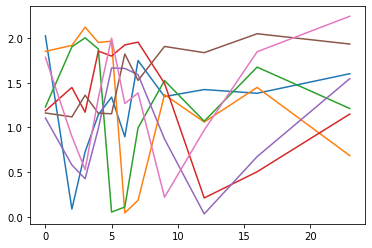

In [ ]:
indices = [0,2,3,4,5,6,7,9,12,16,23]

divs = alpha_diversity(metric="shannon", counts=stein13.transpose().values, ids=list(stein13.columns))
for i in range(7):
    plt.plot(indices, divs.values[i*11 : (i+1)*11])

Node 'n0' initialized
Interaction 'n0->n0' added
set m:(n0)->(n0):   0:11    0:11
Added x0 vector to node n0
Added growth rates to node n0
Initialized
Added x0 vector to node n0


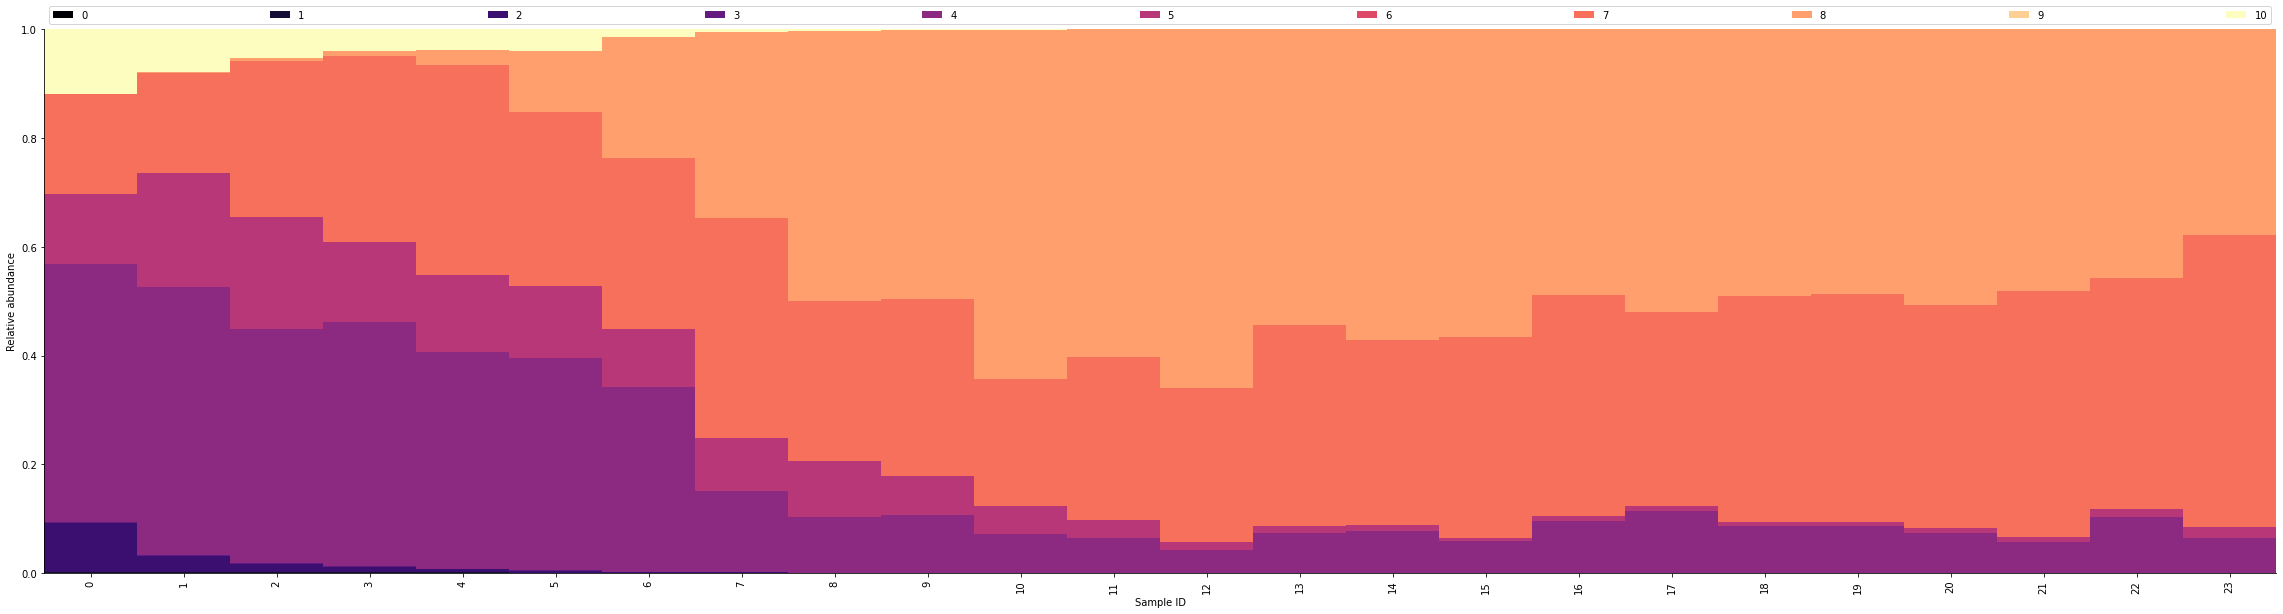

In [ ]:
gen_alpha = OmicsGenerator(
    node_sizes=[11],
    init_full=True,
    time_points=240
)
gen_alpha.set_initial_value('n0', stein13[(2,1,0)])

z,x,y = gen_alpha.generate(dt=.1, downsample=10, noise_var=.1)
plot_timecourse(y['n0'])

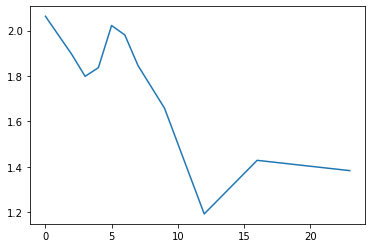

In [ ]:
indices = [0,2,3,4,5,6,7,9,12,16,23]
indices_s1r1 = [(2,1,x) for x in indices]
y_matched = y['n0'][indices]
divs_simulated = alpha_diversity(metric="shannon", counts=y_matched, ids=indices)
plt.plot(indices, divs_simulated)

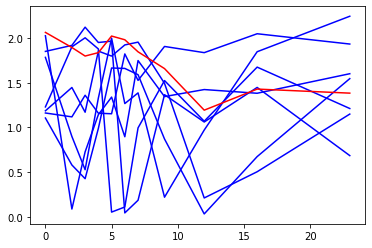

In [ ]:
# Plot together 
for i in range(7):
    plt.plot(indices, divs.values[i*11 : (i+1)*11], c="blue")
plt.plot(indices, divs_simulated, label="simulated", c="red")

In [ ]:
# This is getting impossible. Let's do some transformations:

stein13_better = stein13.transpose()
stein13_better = stein13_better.reset_index()
stein13_better = stein13_better.rename(columns = {
    "level_0" : "Population",
    "level_1" : "Replicate",
    "level_2" : "Time"
})

stein13_better["Population"] = pd.to_numeric(stein13_better["Population"])
stein13_better["Replicate"] = pd.to_numeric(stein13_better["Replicate"])
stein13_better["Time"] = pd.to_numeric(stein13_better["Time"])

stein13_better.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Population                                  77 non-null     int64  
 1   Replicate                                   77 non-null     int64  
 2   Time                                        77 non-null     int64  
 3   undefined_genus_of_Enterobacteriaceae       77 non-null     float64
 4   Blautia                                     77 non-null     float64
 5   Barnesiella                                 77 non-null     float64
 6   undefined_genus_of_unclassified_Mollicutes  77 non-null     float64
 7   undefined_genus_of_Lachnospiraceae          77 non-null     float64
 8   Akkermansia                                 77 non-null     float64
 9   Clostridium_difficile                       77 non-null     float64
 10  unclassified_Lac

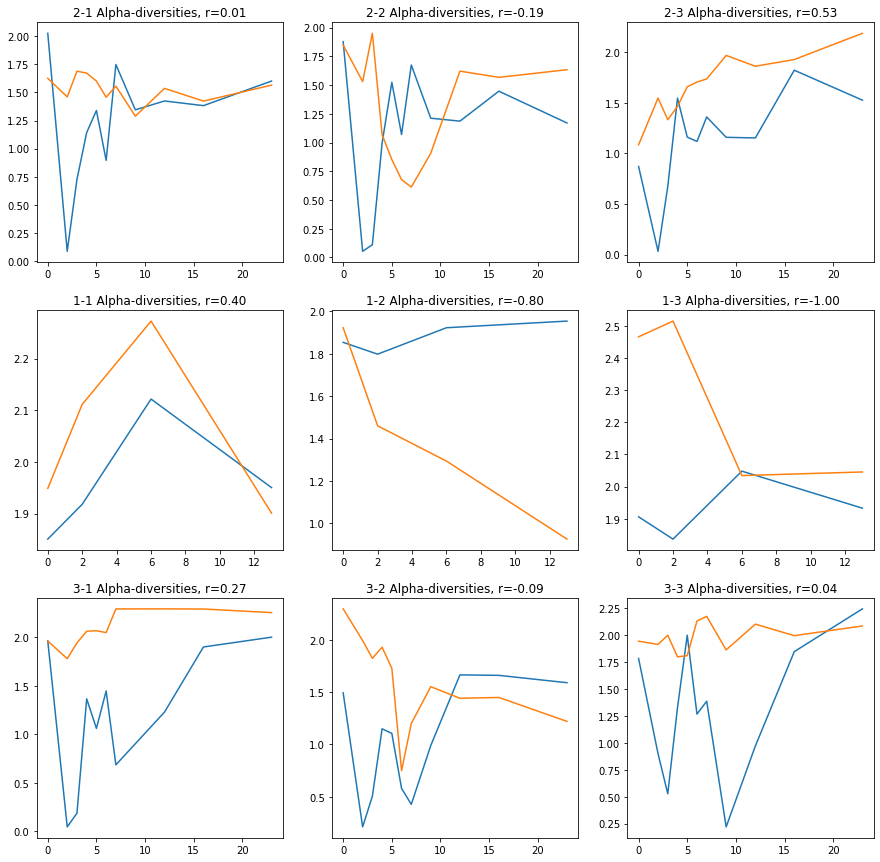

In [ ]:
from scipy.stats import spearmanr

# Get ids
ids = [str(x) for x in stein13_better.values[:,:3]]

# Compute true diversities - use old stein13 dataframe because for some reason it doesn't work
divs_better = alpha_diversity(
    metric="shannon", 
    counts=stein13_better.values[:,3:],
    ids=[str(x) for x in stein13_better.values[:,:3]]
)

# Dataframe for tracking
simulation_results = pd.DataFrame(columns={"time", "alpha"})

# Make a big plot
k = 0
fig, axs = plt.subplots(3,3, figsize=(15,15))

for sample in stein13_better["Population"].unique():
    filter1 = stein13_better[stein13_better["Population"] == sample]

    for replicate in filter1["Replicate"].unique():
        filter2 = filter1[filter1["Replicate"] == replicate]
        times = filter2["Time"].unique()

        # Simulate trajectories
        gen_alpha = OmicsGenerator(
            node_sizes=[11],
            init_full=True,
            time_points=240,
            silent=True
        )
        x0 = np.array(filter2[filter2["Time"] == 0].values[0][3:])
        gen_alpha.set_initial_value('n0', x0)
        z,x,y = gen_alpha.generate(
            dt=.1, 
            downsample=10, 
            noise_var=.2
        )

        # Compute diversity + Spearman R
        alpha = alpha_diversity(
            metric="shannon",
            counts=y['n0'][times],
            ids=[str(x) for x in filter2.values[:,:3]]
        )
        alpha_true = divs_better.iloc[filter2.index]
        r = spearmanr(alpha_true, alpha)[0]

        # Plot diversities
        i,j = np.divmod(k, 3)
        axs[i,j].plot(times, alpha_true, label="True diversity")
        axs[i,j].plot(times, alpha, label="Simulated diversity")
        axs[i,j].set_title(f"{sample}-{replicate} Alpha-diversities, r={r:.2f}")

        # Bookkeeping
        k += 1
        experiment_results = [{"time" : t, "alpha" : a} for t,a in zip(times, alpha)]
        simulation_results = simulation_results.append(experiment_results, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

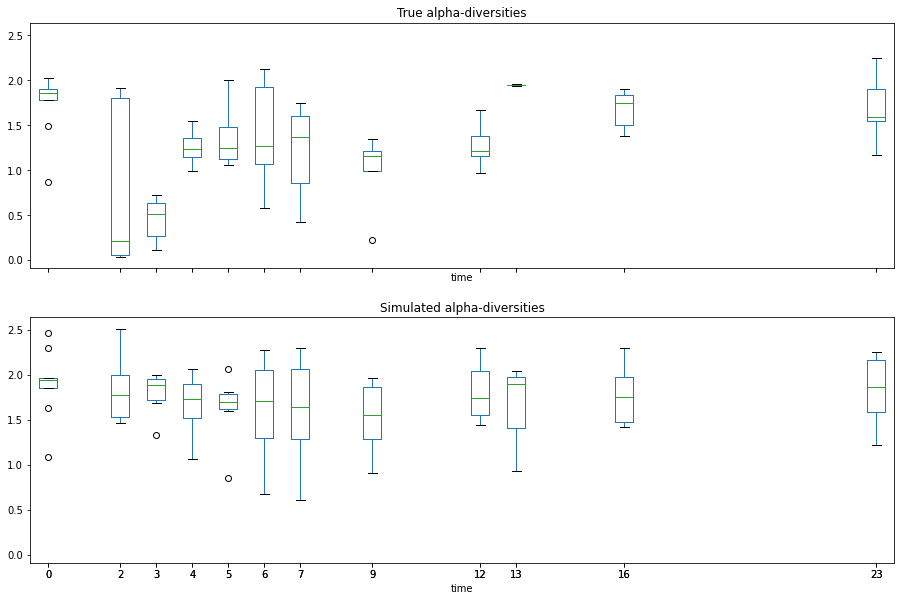

In [ ]:
# Maybe a boxplot version of true dists
divs_dist = pd.DataFrame(divs_better, columns=["alpha"])
divs_dist["time"] = list(stein13_better["Time"])

fig, axs = plt.subplots(2, 1, figsize=(15,10), sharey=True, sharex=True)

divs_dist.boxplot(
    "alpha", 
    by="time", 
    ax=axs[0],
    positions=divs_dist["time"].sort_values().unique(),
    grid=False,
)
axs[0].set_title("True alpha-diversities")

simulation_results.boxplot(
    "alpha", 
    by="time", 
    ax=axs[1],
    positions=simulation_results["time"].sort_values().unique(),
    grid=False,
)
axs[1].set_title("Simulated alpha-diversities")
fig.suptitle("")

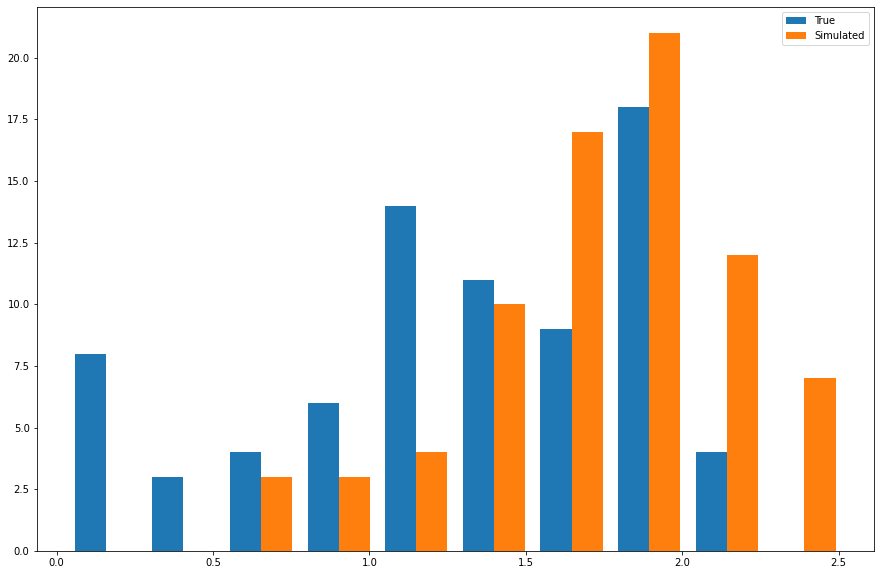

In [ ]:
# Plot distributions of real vs. expected alpha diversities
fig = plt.figure(figsize=(15,10))
plt.hist([divs_dist["alpha"], simulation_results["alpha"]], bins=10)
plt.legend(labels=["True", "Simulated"])

2 1
2 2
2 3
1 1
1 2
1 3


/content/misdeed/src/OmicsGenerator.py:796: RuntimeWarning: overflow encountered in multiply
  return xt * (growth_rates + interaction_coef + intervention_coef)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:111: RuntimeWarning: invalid value encountered in multiply
  y1 = y0 + h0 * direction * f0
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:113: RuntimeWarning: invalid value encountered in subtract
  d2 = norm((f1 - f0) / scale) / h0


3 1
3 2
3 3


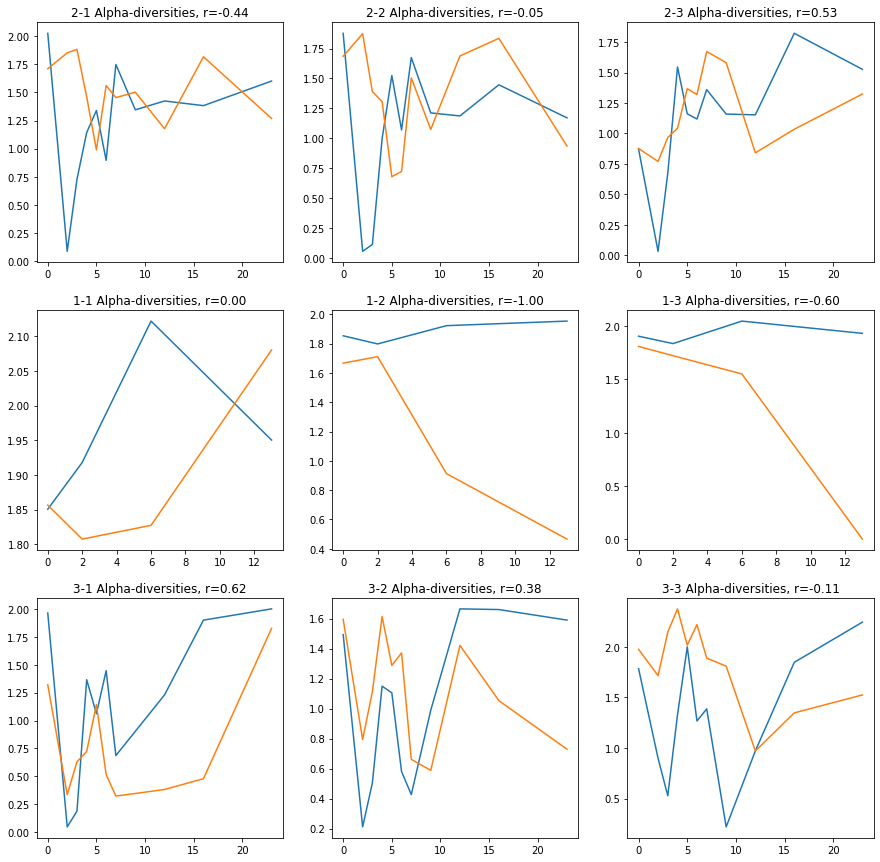

In [ ]:
# Alpha diversity with inferred gLV params 
from misdeed.src.inference import infer_glv_params

# Dataframe for tracking
simulation_results_glv = pd.DataFrame(columns={"time", "alpha"})

# Make a big plot
k = 0
fig, axs = plt.subplots(3,3, figsize=(15,15))

for sample in stein13_better["Population"].unique():
    filter1 = stein13_better[stein13_better["Population"] == sample]

    for replicate in filter1["Replicate"].unique():
        print(sample, replicate)
        filter2 = filter1[filter1["Replicate"] == replicate]
        times = filter2["Time"].unique()
        # dt = np.hstack((0, np.diff(np.array(times))))
        dt = np.diff(np.array(times))
        abundances = filter2.values[:,3:]

        # Infer GLV params
        M,u,E = infer_glv_params(
            abundances=abundances,
            interventions=None,
            interaction_reg=10,
            growth_reg=10,
            intervention_reg=0,
            dt=dt
        )
        x0 = np.array(filter2[filter2["Time"] == 0].values[0][3:])

        # Simulate trajectories
        gen_alpha = OmicsGenerator(
            node_sizes=[11],
            time_points=240,
            silent=True
        )
        gen_alpha.add_interaction('i1', 'n0', 'n0', M)
        gen_alpha.set_initial_value('n0', u, growth_rate=True)
        gen_alpha.set_initial_value('n0', x0)
        z,x,y = gen_alpha.generate(
            dt=.1, 
            downsample=10, 
            noise_var=.2
        )

        # Compute diversity + Spearman R
        alpha = alpha_diversity(
            metric="shannon",
            counts=y['n0'][times],
            ids=[str(x) for x in filter2.values[:,:3]]
        )
        alpha_true = divs_better.iloc[filter2.index]
        r = spearmanr(alpha_true, alpha)[0]

        # Plot diversities
        i,j = np.divmod(k, 3)
        axs[i,j].plot(times, alpha_true, label="True diversity")
        axs[i,j].plot(times, alpha, label="Simulated diversity")
        axs[i,j].set_title(f"{sample}-{replicate} Alpha-diversities, r={r:.2f}")

        # Bookkeeping
        k += 1
        experiment_results = [{"time" : t, "alpha" : a} for t,a in zip(times, alpha)]
        simulation_results_glv = simulation_results_glv.append(experiment_results, ignore_index=True)

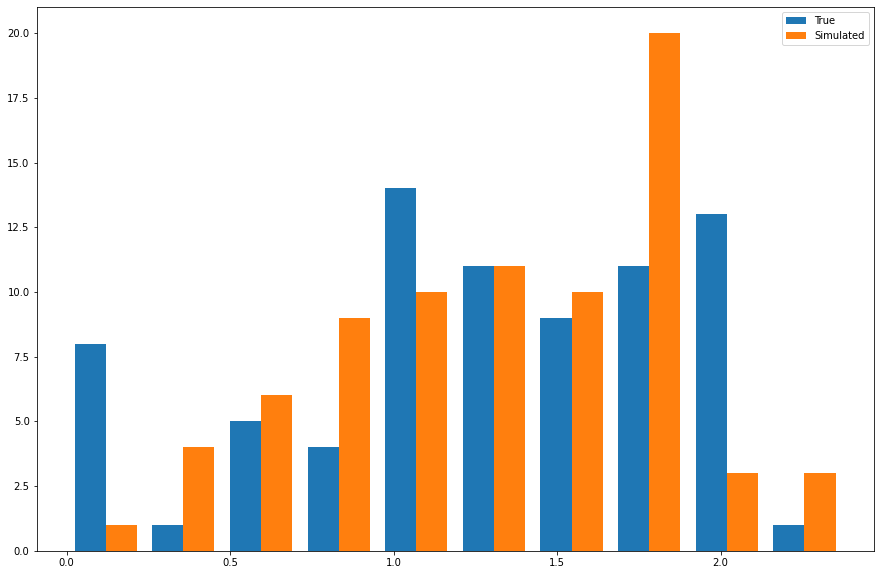

In [ ]:
# Plot distributions of real vs. expected alpha-diversities
fig = plt.figure(figsize=(15,10))
plt.hist([divs_dist["alpha"], simulation_results_glv["alpha"]], bins=10)
plt.legend(labels=["True", "Simulated"])

## Sparsity

## Differential abundance

# MiSDEED self-accuracy

In [ ]:
# Differential abundance for Stein samples

stein_da = 

In [ ]:
from misdeed.src.inference import infer_glv_params

def self_accuracy(n_time_points, dt=1e-1):
    """
    Track differential abundance changes for inferred gLV parameters
    """

    ds = int(1/dt)
    intervention_vector = 2 * (0.5 - np.random.rand(100))
    U = np.zeros(shape=(n_time_points * ds,))
    U[int(n_time_points * ds / 2):] = 1

    gen = OmicsGenerator(node_sizes=[100], init_full=True, time_points=n_time_points*ds, silent=True,)
    gen.add_intervention(name='i1', node_name='n0', vector=intervention_vector, U=U)
    z,x,y = gen.generate(dt=dt, downsample=ds, noise_var=0)
    M,u,E = infer_glv_params(
        abundances=z['n0'],
        interventions=U,
        interaction_reg=10,
        growth_reg=10,
        intervention_reg=0,
        dt=dt
    )
    gen_inferred = OmicsGenerator(node_sizes=[100], time_points=n_time_points*ds, silent=True)
    gen_inferred.add_interaction(name="M", outbound_node_name="n0", inbound_node_name="n0", matrix=M)
    gen_inferred.set_initial_value(node_name="n0", values=z['n0'][0])
    gen_inferred.set_initial_value(node_name="n0", values=u.reshape(-1), growth_rate=True)
    z_inferred, x_inferred, y_inferred = gen_inferred.generate(dt=dt, downsample=ds, noise_var=0)

    results = pd.DataFrame(
        columns=["n_time_points", "time", "true_abundance", "predicted_abundance", "diff"]
    )
    for t in range(n_time_points):
        result = {
            "n_time_points" : n_time_points,
            "time" : t,
            "true_abundance" : y['n0'][t],
            "predicted_abundance" : y_inferred['n0'][t],
            "diff" : np.linalg.norm(y['n0'][t] - y_inferred['n0'][t])
        }
        results = results.append(result, ignore_index=True)
    
    return results


/content/misdeed/src/OmicsGenerator.py:870: RuntimeWarning: invalid value encountered in true_divide
  x = np.apply_along_axis(lambda a: a/sum(a), 1, x)
/content/misdeed/src/OmicsGenerator.py:870: RuntimeWarning: invalid value encountered in true_divide
  x = np.apply_along_axis(lambda a: a/sum(a), 1, x)


,n_time_points,time,true_abundance,predicted_abundance,diff
0,1,0,"[0.019, 0.01773, 0.03737, 0.02212, 0.01436, 0....","[0.0, 0.05142, 0.0, 0.0, 0.0, 0.0, 0.01116, 0....",0.226170
0,1,0,"[0.0055, 0.01083, 0.02864, 0.0, 0.01247, 0.014...","[0.02684, 0.02945, 0.02328, 0.0, 0.0, 0.01603,...",0.151911
0,1,0,"[0.0, 0.00458, 0.0, 0.0, 0.0, 0.03601, 0.0, 0....","[0.0, 0.03987, 0.0, 0.0, 0.0, 0.00343, 0.0, 0....",0.222808
0,1,0,"[0.00056, 0.0, 0.0, 0.0, 0.00015, 0.0, 0.0, 0....","[0.02302, 0.0, 0.0, 0.0, 0.00365, 0.0, 0.0, 0....",0.167056
0,1,0,"[0.0262, 0.0, 0.0, 0.05816, 0.0, 0.00905, 0.0,...","[0.0, 0.0, 0.0, 0.08, 0.0, 0.0, 0.0, 0.0, 0.03...",0.141124
...,...,...,...,...,...
41,46,41,"[0.0, 0.0, 1e-05, 0.0, 0.0, 0.03816, 0.05686, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.432844
42,46,42,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.03784, 0.05747, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.431626
43,46,43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.03726, 0.05673, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.434932
44,46,44,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.03725, 0.05742, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.433330


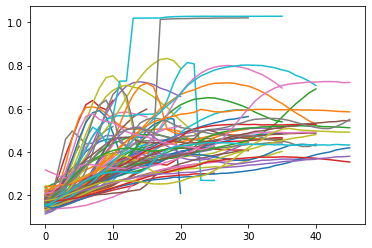

In [ ]:
results = pd.DataFrame()
for n_time_points in range(1,50,5):
    for m in range(10): # number of replicates
        r = self_accuracy(n_time_points)
        results = results.append(r)
        plt.plot(r['time'], r['diff'])

plt.

(11,)
[5.26843214 3.53023178 0.0095191  2.36779766 0.40600349 0.66037001
 0.         0.16237039 1.08875343 0.1520223  0.45779451]
(11,)
[1.21677773 1.82310829 0.08517232 0.10346128 0.41379381 1.85935093
 0.         0.28957608 1.29801788 0.0100199  0.87738982]
(11,)
[1.2126636  1.58586329 0.93293786 0.16463726 0.00329287 2.31624316
 0.         0.00514901 2.14603851 0.11407693 1.58428071]
(11,)
[0.         0.01235069 3.02176547 0.23933211 3.40682825 0.
 0.         0.57898719 0.1684884  0.         2.53779552]


ValueError: ignored

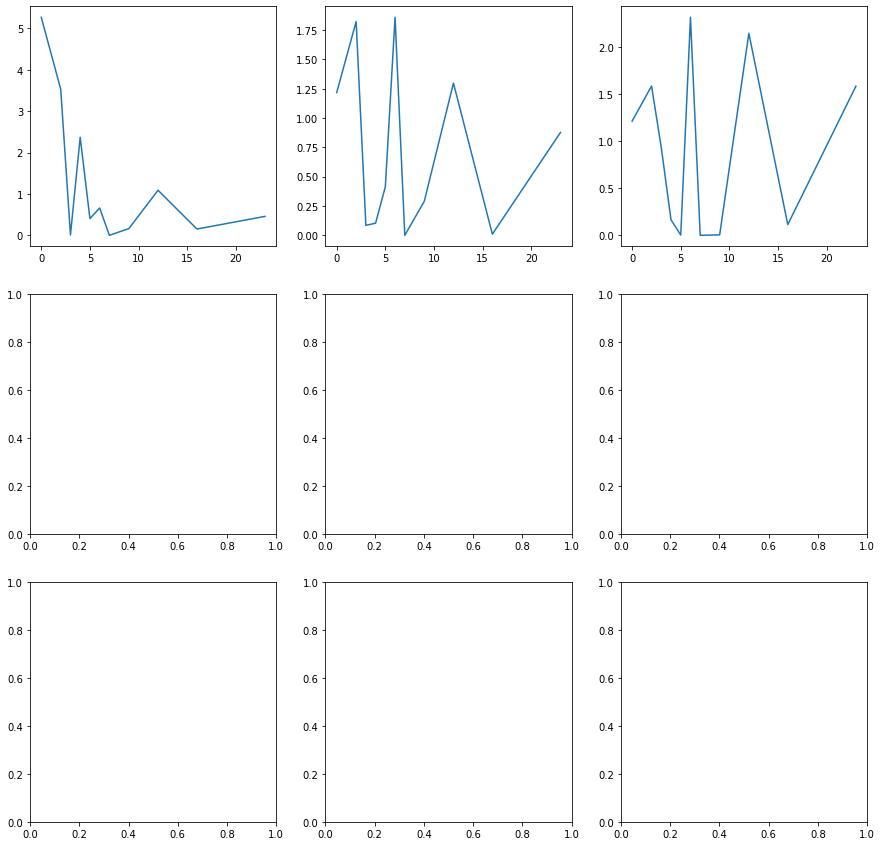

In [ ]:
# from scipy.stats import spearmanr

# # Get ids
# ids = [str(x) for x in stein13_better.values[:,:3]]

# # Compute true diversities - use old stein13 dataframe because for some reason it doesn't work
# divs_better = alpha_diversity(
#     metric="shannon", 
#     counts=stein13_better.values[:,3:],
#     ids=[str(x) for x in stein13_better.values[:,:3]]
# )

# # Dataframe for tracking
# simulation_results = pd.DataFrame(columns={"time", "alpha"})
simulation_da_results = pd.DataFrame(columns={"time", "alpha"})

# Make a big plot
k = 0
fig, axs = plt.subplots(3,3, figsize=(15,15))

for sample in stein13_better["Population"].unique():
    filter1 = stein13_better[stein13_better["Population"] == sample]

    for replicate in filter1["Replicate"].unique():
        filter2 = filter1[filter1["Replicate"] == replicate]
        times = filter2["Time"].unique()

        # Simulate trajectories
        gen_sim = OmicsGenerator(
            node_sizes=[11],
            init_full=True,
            time_points=240,
            silent=True
        )
        x0 = np.array(filter2[filter2["Time"] == 0].values[0][3:])
        gen_sim.set_initial_value('n0', x0)
        z,x,y = gen_sim.generate(
            dt=.1, 
            downsample=10, 
            noise_var=.2
        )

        # # Compute diversity + Spearman R
        # alpha = alpha_diversity(
        #     metric="shannon",
        #     counts=y['n0'][times],
        #     ids=[str(x) for x in filter2.values[:,:3]]
        # )
        # alpha_true = divs_better.iloc[filter2.index]
        # r = spearmanr(alpha_true, alpha)[0]

        # Compute differential abundance
        vals_sim = y['n0'][times]
        da = np.linalg.norm(filter2.values[:,3:] - vals_sim, axis=0)
        print(da.shape)
        print(da)

        # Plot diversities
        i,j = np.divmod(k, 3)
        axs[i,j].plot(times, da)
        # axs[i,j].plot(times, alpha_true, label="True diversity")
        # axs[i,j].plot(times, alpha, label="Simulated diversity")
        # axs[i,j].set_title(f"{sample}-{replicate} Alpha-diversities, r={r:.2f}")

        # Bookkeeping
        k += 1
        # experiment_results = [{"time" : t, "alpha" : a} for t,a in zip(times, alpha)]
        # simulation_results = simulation_results.append(experiment_results, ignore_index=True)